In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nb
import cv2
from scipy.ndimage import rotate

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


## Mask Colour generation and Slice Selection

In [2]:
def generate_mask(mask):    # providing different colours to the segmentation labels
    
    m = len(mask)
    n = len(mask[0])
    X = np.zeros((m,n,3))
 
    for i in range(len(mask)):
        for j in range(len(mask[i])):
            if mask[i,j] == 4:        # enhancing component
                X[i,j] = [0,0,255]
            if mask[i,j] == 1:        # non enhancing component
                X[i,j] = [255,0,0]
            if mask[i,j] == 2:        # edema component
                X[i,j] =[0,255,0]
        
        
    return X

In [32]:
fl =  '/home/ankit/Desktop/Glioma Paper/TCGA-GBM/NIfTI__Sgmntns_rad_102sub/TCGA-06-0130/TCGA-06-0130_2001.09.11_t1.nii.gz'
# fl inputs a T1 image for visualization. Define a path for the T1 image

def vis(k):
    mask =  fl.replace('_t1.nii.gz', '_GlistrBoost_ManuallyCorrected.nii.gz') #replace T1 image with the segmentation mask in name
    mask = nb.load(mask.rstrip()).get_fdata()                                 #load mask
    x = mask[:,:,k].astype(np.uint8)                                          #sequentially select mask slices
    contours = cv2.findContours(image = x, mode = cv2.RETR_TREE, method = cv2.CHAIN_APPROX_SIMPLE)[0]       #calculate contours for the mask

    c_0 = contours[0]                                                         # Get the 4 points of the bounding rectangle
    xx, yy, w, h = cv2.boundingRect(c_0)


    img1 = nb.load(fl.rstrip()).get_fdata()[:,:,k]                            #Load T1 image
    

    fig, ax = plt.subplots(1,2,figsize=(20,20))
    ax[0].imshow(rotate(img1,270), cmap='gray')                               #Plotting the T1 image with coloured labels
    ax[0].imshow(generate_mask(rotate(x,270)),alpha=0.4)
    ax[0].set_axis_off()
    
    ax[1].imshow(rotate(img1,270), cmap='gray')    
    ax[1].set_axis_off()
    plt.show()
    
    return

In [33]:
interact(vis, k = (0, 256)) # Adjust the slider to between slices. Error: tuple index out of range --> Slice does not exist. Keep sliding to find the image

interactive(children=(IntSlider(value=128, description='k', max=256), Output()), _dom_classes=('widget-interac…

<function __main__.vis(k)>

## Visualization of Best Slice

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


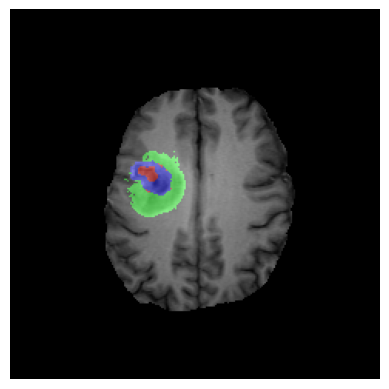

In [35]:
'''To run after specifying the best slice in the interactive plot - *to generate an image*'''

def image_creator(slice):
    mask =  fl.replace('_t1.nii.gz', '_GlistrBoost_ManuallyCorrected.nii.gz') 
    mask = nb.load(mask.rstrip()).get_fdata()
    x = mask[:,:,int(slice)].astype(np.uint8)               #change here
    contours = cv2.findContours(image = x, mode = cv2.RETR_TREE, method = cv2.CHAIN_APPROX_SIMPLE)[0]
    
    c_0 = contours[0]                                                                          
    xx, yy, w, h = cv2.boundingRect(c_0)   
    img1 = nb.load(fl.rstrip()).get_fdata()[:,:,int(slice)] #change here
    
    plt.imshow(rotate(img1,270), cmap='gray')  
    plt.imshow(generate_mask(rotate(x,270)),alpha=0.4)                      
                            
    plt.axis('off')
    plt.show()

    ##plt.savefig('image_name' + '.tiff', dpi = 400)  #Uncomment to save the figure.

image_creator(97)

## Single Image Visualization - Can also save 

### Mask overlaid on T1 image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


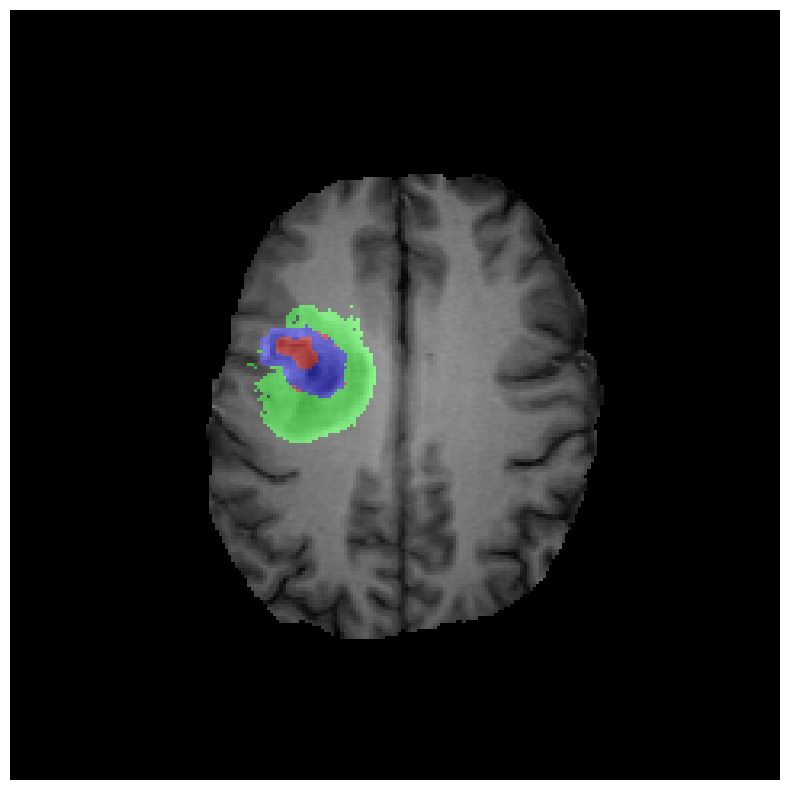

In [37]:
img1 = nb.load(fl.rstrip()).get_fdata()[:,:,int(97)] #change here
mask = fl.replace('_t1.nii.gz', '_GlistrBoost_ManuallyCorrected.nii.gz') 
mask = nb.load(mask.rstrip()).get_fdata()

x = mask[:,:,int(97)].astype(np.uint8)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(rotate(img1,270), cmap='gray')
plt.imshow(generate_mask(rotate(x,270)), alpha = 0.4)


# plt.text(40, 175, 'Left', fontweight= 'bold', color ='white', fontsize= 'xx-large', fontfamily ='monospace')
# plt.text(180, 175, 'Right', fontweight= 'bold', color ='white', fontsize= 'xx-large', fontfamily ='monospace')

#plt.savefig('IDH_mt_G3_seg.tiff', dpi = 300)

### T1

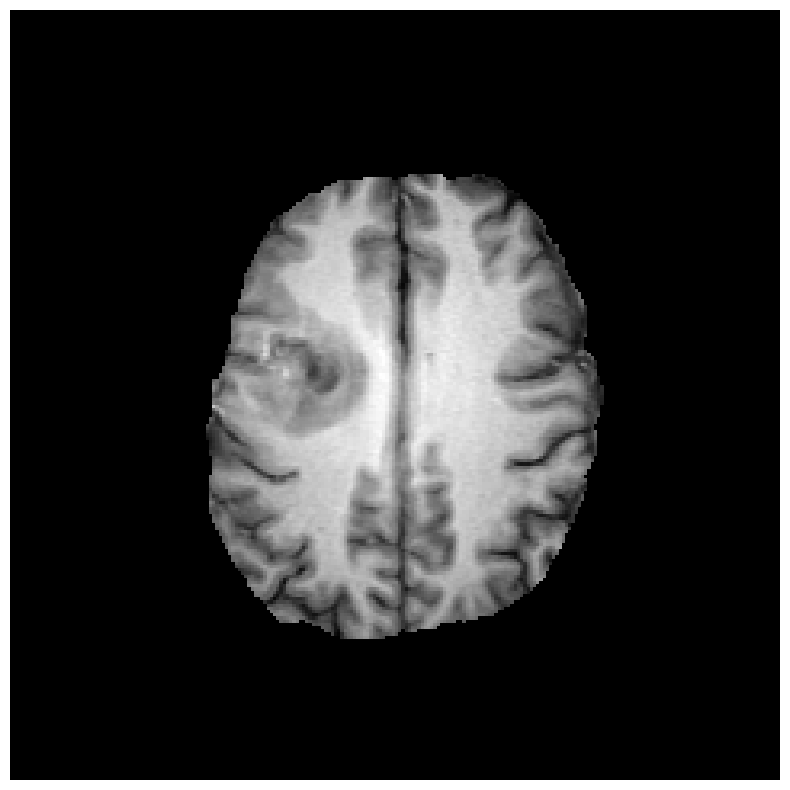

In [38]:
plt.figure(figsize=(10, 10))
plt.axis('off')

plt.imshow(rotate(img1,270), cmap='gray')

# plt.text(40, 175, 'Left', fontweight= 'bold', color ='white', fontsize= 'xx-large', fontfamily ='monospace')
# plt.text(180, 175, 'Right', fontweight= 'bold', color ='white', fontsize= 'xx-large', fontfamily ='monospace')

#plt.savefig('IDH_wt_GBM_T1.tiff', dpi = 300)

### Mask Image only

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


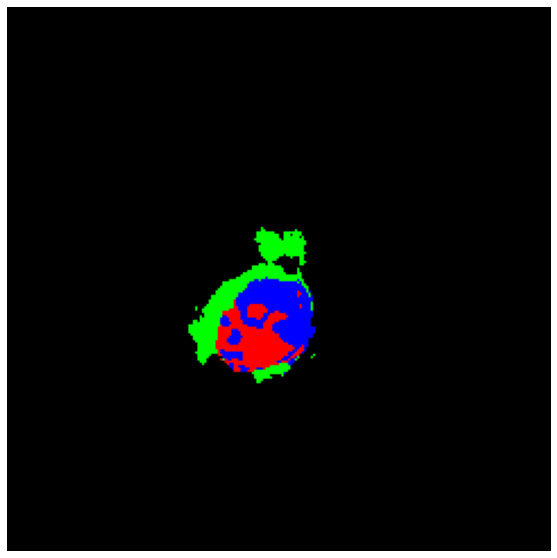

In [67]:
plt.figure(figsize=(10, 10))
plt.axis('off')

plt.imshow(generate_mask(rotate(x,270)))

#plt.savefig('IDH_wt_GBM_mask.tiff', dpi = 300)

## For generation of representative general image

In [73]:
fl =  '/home/aswin/project/brain/data/TCIA_LGG/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-DU-7015/TCGA-DU-7015_1989.06.18_t1.nii.gz'

mask =  fl.replace('_t1.nii.gz', '_GlistrBoost_ManuallyCorrected.nii.gz') 
mask = nb.load(mask.rstrip()).get_fdata()
x = mask[:,:, 61].astype(np.uint8)  #change here
contours = cv2.findContours(image = x, mode = cv2.RETR_TREE, method = cv2.CHAIN_APPROX_SIMPLE)[0]

c_0 = contours[0]# Get the 4 points of the bounding rectangle
xx, yy, w, h = cv2.boundingRect(c_0)    

img1 = nb.load(fl.rstrip()).get_fdata()[:,:,61] #change here

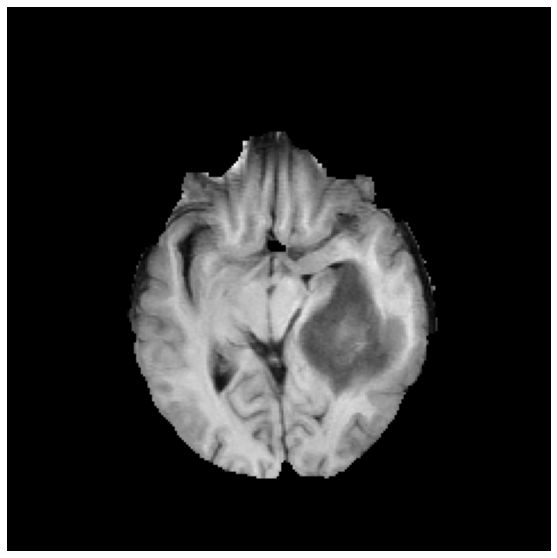

In [75]:
plt.figure(figsize=(10, 10))
plt.axis('off')

plt.imshow(rotate(img1,270), cmap='gray')

# plt.text(30, 175, 'Left', fontweight= 'bold', color ='white', fontsize= 'x-large', fontfamily ='monospace')
# plt.text(190, 175, 'Right', fontweight= 'bold', color ='white', fontsize= 'x-large', fontfamily ='monospace')
# plt.text(100, 40, 'Anterior', fontweight= 'bold', color ='white', fontsize= 'x-large', fontfamily ='monospace')
# plt.text(100, 225, 'Posterior', fontweight= 'bold', color ='white', fontsize= 'x-large', fontfamily ='monospace')

#plt.savefig('Repre_img_T1.tiff', dpi = 300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


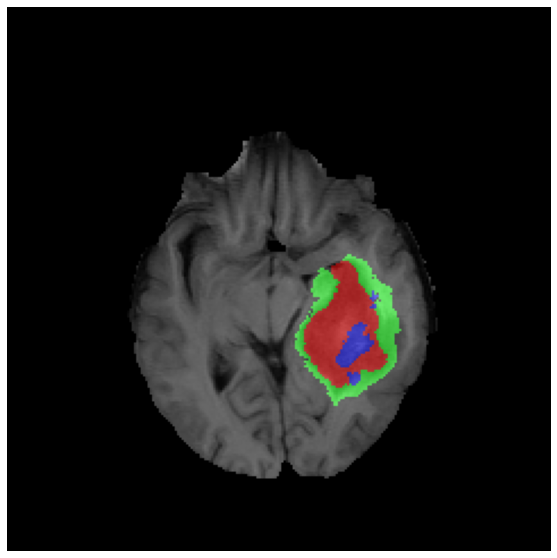

In [76]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(rotate(img1,270), cmap='gray')
plt.imshow(generate_mask(rotate(x,270)),alpha=0.5)

# plt.text(30, 175, 'Left', fontweight= 'bold', color ='white', fontsize= 'x-large', fontfamily ='monospace')
# plt.text(190, 175, 'Right', fontweight= 'bold', color ='white', fontsize= 'x-large', fontfamily ='monospace')
# plt.text(100, 40, 'Anterior', fontweight= 'bold', color ='white', fontsize= 'x-large', fontfamily ='monospace')
# plt.text(100, 225, 'Posterior', fontweight= 'bold', color ='white', fontsize= 'x-large', fontfamily ='monospace')

#plt.savefig('Repre_img_masked.tiff', dpi = 300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


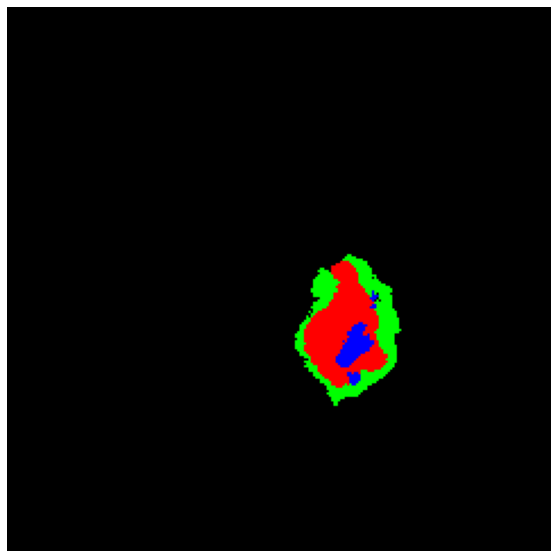

In [77]:
plt.figure(figsize=(10, 10))
plt.imshow(generate_mask(rotate(x,270)))
plt.axis('off')

#plt.savefig('Repre_img_mask.tiff', dpi = 300)

In [ ]:
path_gbm="/home/aswin/project/brain/data/TCGA-GBM/NIfTI__Sgmntns_rad_102sub"
path_lgg="/home/aswin/project/brain/data/TCIA_LGG/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations"

In [ ]:
['TCGA-06-2570_2007.07.26_t1.nii.gz', 'TCGA-06-2570_2007.07.26_t2.nii.gz', 'TCGA-06-2570_2007.07.26_GlistrBoost.nii.gz', 'TCGA-06-2570_2007.07.26_t1Gd.nii.gz', 'TCGA-06-2570_2007.07.26_GlistrBoost_ManuallyCorrected.nii.gz', 'TCGA-06-2570_2007.07.26_flair.nii.gz']